In [1]:
%pip install dlib
import argparse
import dlib
from utils.aux_functions import *


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:


from types import SimpleNamespace
# Initialize args with desired values
args = SimpleNamespace()
args.path = r"D:\fyp\GEN\gender 1.0\gender_dataset_face\gender_dataset_face\woman\face_0.jpg"
args.mask_type = "surgical"
args.pattern = ""
args.pattern_weight = 0.5
args.color = "#0473e2"
args.color_weight = 0.5
args.code = ""
args.verbose = True
args.write_original_image = True

# Set up dlib face detector and predictor
args.detector = dlib.get_frontal_face_detector()
path_to_dlib_model = "dlib_models/shape_predictor_68_face_landmarks.dat"
if not os.path.exists(path_to_dlib_model):
    download_dlib_model()
    # Download dlib model function (include your existing function here)

args.predictor = dlib.shape_predictor(path_to_dlib_model)

# Extract data from code
mask_code = "".join(args.path.split()).split(",")
code_count = np.zeros(len(mask_code))
mask_dict_of_dict = {}


for i, entry in enumerate(mask_code):
    mask_dict = {}
    mask_color = ""
    mask_texture = ""
    mask_type = entry.split("-")[0]
    if len(entry.split("-")) == 2:
        mask_variation = entry.split("-")[1]
        if "#" in mask_variation:
            mask_color = mask_variation
        else:
            mask_texture = mask_variation
    mask_dict["type"] = mask_type
    mask_dict["color"] = mask_color
    mask_dict["texture"] = mask_texture
    mask_dict_of_dict[i] = mask_dict

# Check if path is file or directory or none
is_directory, is_file, is_other = check_path(args.path)
display_MaskTheFace()

if is_directory:
    path, dirs, files = os.walk(path).__next__()
    file_count = len(files)
    dirs_count = len(dirs)
    if len(files) > 0:
        print_orderly("Masking image files", 60)

    # Process files in the directory if any
    for f in tqdm(files):
        image_path = path + "/" + f

        write_path = path + "_masked"
        if not os.path.isdir(write_path):
            os.makedirs(write_path)

        if is_image(image_path):
            # Proceed if file is image
            if verbose:
                str_p = "Processing: " + image_path
                tqdm.write(str_p)

            split_path = f.rsplit(".")
            masked_image, mask, mask_binary_array, original_image = mask_image(
                image_path,args
            )
            for i in range(len(mask)):
                w_path = (
                    write_path
                    + "/"
                    + split_path[0]
                    + "_"
                    + mask[i]
                    + "."
                    + split_path[1]
                )
                img = masked_image[i]
                cv2.imwrite(w_path, img)

    print_orderly("Masking image directories", 60)

    # Process directories withing the path provided
    for d in tqdm(dirs):
        dir_path = path + "/" + d
        dir_write_path = write_path + "/" + d
        if not os.path.isdir(dir_write_path):
            os.makedirs(dir_write_path)
        _, _, files = os.walk(dir_path).__next__()

        # Process each files within subdirectory
        for f in files:
            image_path = dir_path + "/" + f
            if verbose:
                str_p = "Processing: " + image_path
                tqdm.write(str_p)
            write_path = dir_write_path
            if is_image(image_path):
                # Proceed if file is image
                split_path = f.rsplit(".")
                masked_image, mask, mask_binary, original_image = mask_image(
                    image_path
                )
                for i in range(len(mask)):
                    w_path = (
                        write_path
                        + "/"
                        + split_path[0]
                        + "_"
                        + mask[i]
                        + "."
                        + split_path[1]
                    )
                    w_path_original = write_path + "/" + f
                    img = masked_image[i]
                    # Write the masked image
                    cv2.imwrite(w_path, img)
                    if write_original_image:
                        # Write the original image
                        cv2.imwrite(w_path_original, original_image)

            if verbose:
                print(code_count)

# Process if the path was a file
elif is_file:
    print("Masking image file")
    image_path = args.path
    write_path = args.path.rsplit(".")[0]
    if is_image(image_path):
        # Proceed if file is image
        # masked_images, mask, mask_binary_array, original_image
        masked_image, mask, mask_binary_array, original_image = mask_image(
            image_path,args
        )
        for i in range(len(mask)):
            w_path = write_path + "_" + mask[i] + "." + ".jpg"
            img = masked_image[i]
            cv2.imwrite(w_path, img)
else:
    print("Path is neither a valid file or a valid directory")
print("Processing Done")


 __  __           _ _______ _          ______
|  \/  |         | |__   __| |        |  ____|
| \  / | __ _ ___| | _| |  | |__   ___| |__ __ _  ___ ___
| |\/| |/ _` / __| |/ / |  | '_ \ / _ \  __/ _` |/ __/ _ \
| |  | | (_| \__ \   <| |  | | | |  __/ | | (_| | (_|  __/
|_|  |_|\__,_|___/_|\_\_|  |_| |_|\___|_|  \__,_|\___\___|
Masking image file
Faces found:  1
Processing Done


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


 __  __           _ _______ _          ______
|  \/  |         | |__   __| |        |  ____|
| \  / | __ _ ___| | _| |  | |__   ___| |__ __ _  ___ ___
| |\/| |/ _` / __| |/ / |  | '_ \ / _ \  __/ _` |/ __/ _ \
| |  | | (_| \__ \   <| |  | | | |  __/ | | (_| | (_|  __/
|_|  |_|\__,_|___/_|\_\_|  |_| |_|\___|_|  \__,_|\___\___|
Masking image file
Faces found:  1


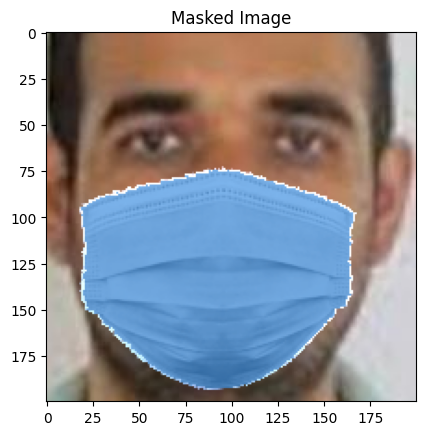

Masked image saved at: D:\utkcropped\utkcropped\5_surgical.jpg
Processing Done


In [5]:
%pip install matplotlib
from types import SimpleNamespace
import matplotlib.pyplot as plt

# Initialize args with desired values
args = SimpleNamespace()
args.path = r"D:\utkcropped\utkcropped\5.jpg"
args.mask_type = "surgical"
args.pattern = ""
args.pattern_weight = 0.5
args.color = "#0473e2"
args.color_weight = 0.5
args.code = ""
args.verbose = True
args.write_original_image = True

# Set up dlib face detector and predictor
args.detector = dlib.get_frontal_face_detector()
path_to_dlib_model = "dlib_models/shape_predictor_68_face_landmarks.dat"
if not os.path.exists(path_to_dlib_model):
    download_dlib_model()
    # Download dlib model function (include your existing function here)

args.predictor = dlib.shape_predictor(path_to_dlib_model)

# Extract data from code
mask_code = "".join(args.path.split()).split(",")
code_count = np.zeros(len(mask_code))
mask_dict_of_dict = {}


for i, entry in enumerate(mask_code):
    mask_dict = {}
    mask_color = ""
    mask_texture = ""
    mask_type = entry.split("-")[0]
    if len(entry.split("-")) == 2:
        mask_variation = entry.split("-")[1]
        if "#" in mask_variation:
            mask_color = mask_variation
        else:
            mask_texture = mask_variation
    mask_dict["type"] = mask_type
    mask_dict["color"] = mask_color
    mask_dict["texture"] = mask_texture
    mask_dict_of_dict[i] = mask_dict

# Check if path is file or directory or none
is_directory, is_file, is_other = check_path(args.path)
display_MaskTheFace()

if is_directory:
    path, dirs, files = os.walk(path).__next__()
    file_count = len(files)
    dirs_count = len(dirs)
    if len(files) > 0:
        print_orderly("Masking image files", 60)

    # Process files in the directory if any
    for f in tqdm(files):
        image_path = path + "/" + f

        write_path = path + "_masked"
        if not os.path.isdir(write_path):
            os.makedirs(write_path)

        if is_image(image_path):
            # Proceed if file is image
            if verbose:
                str_p = "Processing: " + image_path
                tqdm.write(str_p)

            split_path = f.rsplit(".")
            masked_image, mask, mask_binary_array, original_image = mask_image(
                image_path, args
            )
            for i in range(len(mask)):
                w_path = (
                    write_path
                    + "/"
                    + split_path[0]
                    + "_"
                    + mask[i]
                    + "."
                    + split_path[1]
                )
                img = masked_image[i]
                cv2.imwrite(w_path, img)

                # Display the masked image
                plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                plt.title("Masked Image")
                plt.show()

    print_orderly("Masking image directories", 60)

    # Process directories within the path provided
    for d in tqdm(dirs):
        dir_path = path + "/" + d
        dir_write_path = write_path + "/" + d
        if not os.path.isdir(dir_write_path):
            os.makedirs(dir_write_path)
        _, _, files = os.walk(dir_path).__next__()

        # Process each file within subdirectory
        for f in files:
            image_path = dir_path + "/" + f
            if verbose:
                str_p = "Processing: " + image_path
                tqdm.write(str_p)
            write_path = dir_write_path
            if is_image(image_path):
                # Proceed if file is an image
                split_path = f.rsplit(".")
                masked_image, mask, mask_binary, original_image = mask_image(
                    image_path
                )
                for i in range(len(mask)):
                    w_path = (
                        write_path
                        + "/"
                        + split_path[0]
                        + "_"
                        + mask[i]
                        + "."
                        + split_path[1]
                    )
                    w_path_original = write_path + "/" + f
                    img = masked_image[i]
                    # Write the masked image
                    cv2.imwrite(w_path, img)

                    # Display the masked image
                    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                    plt.title("Masked Image")
                    plt.show()

                    if write_original_image:
                        # Write the original image
                        cv2.imwrite(w_path_original, original_image)

            if verbose:
                print(code_count)

# Process if the path was a file
elif is_file:
    print("Masking image file")
    image_path = args.path
    write_path = args.path.rsplit(".")[0]
    if is_image(image_path):
        # Proceed if the file is an image
        # masked_images, mask, mask_binary_array, original_image
        masked_image, mask, mask_binary_array, original_image = mask_image(
            image_path, args
        )
        for i in range(len(mask)):
            w_path = write_path + "_" + mask[i] + ".jpg"
            img = masked_image[i]

            # Display the masked image
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title("Masked Image")
            plt.show()

            cv2.imwrite(w_path, img)
            # Display the path where the masked image is saved
            print("Masked image saved at:", w_path)
else:
    print("Path is neither a valid file nor a valid directory")
print("Processing Done")


In [2]:
import os
import cv2
import numpy as np
import dlib
from types import SimpleNamespace
import matplotlib.pyplot as plt
from tqdm import tqdm

# Make sure to define or import the required functions (e.g., download_dlib_model, check_path, display_MaskTheFace, mask_image)

# Initialize args with desired values
args = SimpleNamespace()
args.path = r"D:\utkcropped\utkcropped\utkcropped"  # Update with your folder path
args.mask_type = "surgical"
args.pattern = ""
args.pattern_weight = 0.5
args.color = "#0473e2"
args.color_weight = 0.5
args.code = ""
args.verbose = True
args.write_original_image = True

# Set up dlib face detector and predictor
args.detector = dlib.get_frontal_face_detector()
path_to_dlib_model = "dlib_models/shape_predictor_68_face_landmarks.dat"
if not os.path.exists(path_to_dlib_model):
    download_dlib_model()  # Include your existing download_dlib_model function here

args.predictor = dlib.shape_predictor(path_to_dlib_model)

# Extract data from code (assuming functions like check_path, display_MaskTheFace, and mask_image are defined)
mask_code = "".join(args.path.split()).split(",")
code_count = np.zeros(len(mask_code))
mask_dict_of_dict = {}

for i, entry in enumerate(mask_code):
    mask_dict = {}
    mask_color = ""
    mask_texture = ""
    mask_type = entry.split("-")[0]
    if len(entry.split("-")) == 2:
        mask_variation = entry.split("-")[1]
        if "#" in mask_variation:
            mask_color = mask_variation
        else:
            mask_texture = mask_variation
    mask_dict["type"] = mask_type
    mask_dict["color"] = mask_color
    mask_dict["texture"] = mask_texture
    mask_dict_of_dict[i] = mask_dict

# Check if path is a file or directory
is_directory, is_file, is_other = check_path(args.path)
display_MaskTheFace()  # Assuming this function is defined

if is_directory:
    path, dirs, files = next(os.walk(args.path))
    file_count = len(files)
    dirs_count = len(dirs)
    if len(files) > 0:
        print_orderly("Masking image files", 60)

    # Create a new folder for masked images
    write_path = os.path.join(args.path, "masked_age")
    os.makedirs(write_path, exist_ok=True)

    # Process files in the directory if any
    for f in tqdm(files):
        image_path = os.path.join(path, f)

        if is_image(image_path):
            # Proceed if file is an image
            if args.verbose:
                str_p = "Processing: " + image_path
                tqdm.write(str_p)

            split_path = f.rsplit(".")
            masked_image, mask, _, _ = mask_image(image_path, args)
            for i in range(len(mask)):
                w_path = os.path.join(write_path, f"{split_path[0]}_{mask[i]}.{split_path[1]}")
                img = masked_image[i]
                cv2.imwrite(w_path, img)

                # Display the masked image
                plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                plt.title("Masked Image")
                plt.show()

    print_orderly("Masking image directories", 60)

    # Process directories within the path provided
    for d in tqdm(dirs):
        dir_path = os.path.join(path, d)
        dir_write_path = os.path.join(write_path, d)
        os.makedirs(dir_write_path, exist_ok=True)
        _, _, files = next(os.walk(dir_path))

        # Process each file within subdirectory
        for f in files:
            image_path = os.path.join(dir_path, f)
            if args.verbose:
                str_p = "Processing: " + image_path
                tqdm.write(str_p)

            if is_image(image_path):
                # Proceed if file is an image
                split_path = f.rsplit(".")
                masked_image, mask, _, _ = mask_image(image_path, args)
                for i in range(len(mask)):
                    w_path = os.path.join(
                        dir_write_path, f"{split_path[0]}_{mask[i]}.{split_path[1]}"
                    )
                    img = masked_image[i]
                    # Write the masked image
                    cv2.imwrite(w_path, img)

                    # Display the masked image
                    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                    plt.title("Masked Image")
                    plt.show()

                    if args.write_original_image:
                        # Write the original image
                        w_path_original = os.path.join(dir_write_path, f)
                        cv2.imwrite(w_path_original, original_image)

            if args.verbose:
                print(code_count)

    # Print the path of the "masked_woman" folder
    print("Masked images saved at:", write_path)

elif is_file:
    # Process if the path was a file
    print("Masking image file")
    image_path = args.path
    write_path = os.path.join(args.path.rsplit(".")[0], "masked_woman")
    os.makedirs(write_path, exist_ok=True)
    if is_image(image_path):
        # Proceed if the file is an image
        masked_image, mask, _, _ = mask_image(image_path, args)
        for i in range(len(mask)):
            w_path = os.path.join(write_path, f"{args.path.rsplit('.')[0]}_{mask[i]}.jpg")
            img = masked_image[i]

            # Display the masked image
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title("Masked Image")
            plt.show()

            cv2.imwrite(w_path, img)
            # Display the path where the masked image is saved
            print("Masked image saved at:", w_path)

    # Print the path of the "masked_woman" folder
    print("Masked images saved at:", write_path)

else:
    print("Path is neither a valid file nor a valid directory")

print("Processing Done")
